In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [12]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=6000, centers=5, n_features=10)
# scatter plot, dots colored by class value
data = pd.DataFrame(X, columns=['Feature {:2d}'.format(i)for i in range(10)])

data
df=data

In [13]:
df

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
0,2.642806,-6.590429,-1.658338,-0.703650,-8.929862,-5.898121,-3.730479,6.300220,-11.109395,-7.208095
1,-3.864113,3.147245,5.689580,4.635072,-1.983071,2.226400,-9.207497,-3.126904,2.477353,-2.582042
2,3.360308,-3.311922,-1.448197,-0.347672,-8.654979,-5.791998,-0.672887,7.041589,-9.204313,-7.658656
3,9.326045,-9.525277,2.393784,-1.424977,-3.888093,7.775031,2.887021,-1.273641,-2.942654,-6.271988
4,-5.543435,3.463623,7.168092,5.419480,-0.295181,2.293976,-7.307801,-0.710739,-0.758411,-4.772015
...,...,...,...,...,...,...,...,...,...,...
5995,7.131970,-7.336505,-2.169405,9.629426,7.432646,2.387007,4.301119,8.586530,1.291508,-3.002227
5996,6.976154,-4.773462,-2.519640,9.828166,9.278255,1.623461,3.655387,7.969388,0.419509,-4.106627
5997,10.016385,-9.937510,3.075680,-6.192758,-3.050969,6.541521,2.243738,-3.065758,-0.549744,-6.930757
5998,-2.978981,5.048425,5.246358,4.534362,-0.666367,3.317580,-6.466236,-2.136623,0.222373,-1.527417


In [14]:
kmeans = KMeans(init="random")
kmeans.fit(df)

KMeans(init='random')

In [15]:
kmeans.cluster_centers_, kmeans.n_iter_

(array([[-3.75686874,  3.7697605 ,  6.76476328,  4.48691311, -1.27199706,
          2.54578169, -6.93592176, -2.61691114, -0.09706653, -2.52657926],
        [-1.2532508 ,  4.55107858, -3.49102667,  6.85443363,  1.41640791,
          1.08437178, -4.3780562 ,  2.30175655, -3.67036575,  4.16707085],
        [ 9.41859662, -8.39755658,  1.96767412, -4.23834093, -3.26548035,
          6.62536796,  2.56091187, -1.64935993, -2.62288276, -7.21358543],
        [ 3.23513614, -5.87446756, -0.97143113,  0.11524591, -8.30457174,
         -6.46234616, -1.4896853 ,  6.10597469, -9.81022276, -7.10272744],
        [-3.46878386,  4.24033822,  6.26346107,  4.17273427, -0.48652042,
          1.95155733, -7.49298713, -2.45364865,  0.47924661, -3.38168189],
        [ 5.81450221, -6.26638935, -3.26577534,  9.53922775,  6.939417  ,
          1.70031079,  2.58649115,  7.6845941 ,  1.50639823, -3.35754278],
        [ 6.52016347, -5.97580838, -3.12022051,  9.91145047,  6.23700292,
          1.46350696,  3.4966495

In [16]:
kmeans.labels_

array([3, 4, 7, ..., 2, 0, 1])

In [17]:
from sklearn.decomposition import PCA
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(df)
kmeans1 = KMeans(init="k-means++",n_clusters=5,n_init=10,max_iter=100)
label = kmeans1.fit_predict(df)

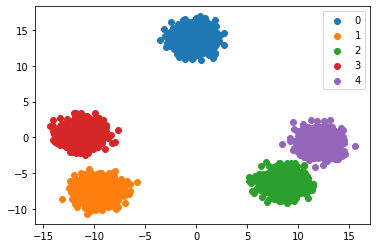

In [18]:
u_labels = np.unique(label)
 
#Visualization
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

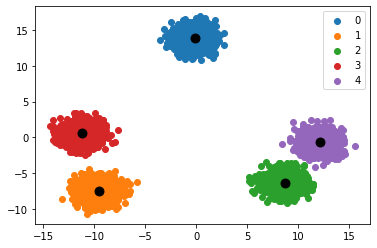

In [19]:
centroids = kmeans1.cluster_centers_
u_labels = np.unique(label)
 

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()

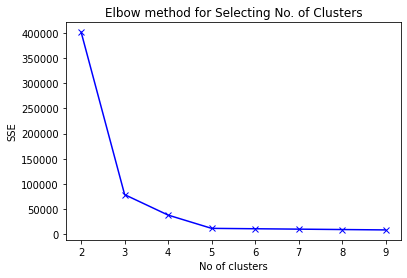

In [20]:
SSE =[]
for i in range(2, 10):
    kmeans = KMeans(init="k-means++",n_clusters=i,n_init=10,max_iter=100)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(2, 10), SSE, 'bx-')
plt.title('Elbow method for Selecting No. of Clusters')
plt.xlabel('No of clusters')
plt.ylabel('SSE')
plt.show()